# Importing the needed libraries

In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 112.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install -U scikit-learn

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', size=12)
plt.rc('axes', labelsize=12, titlesize=12, labelcolor = 'darkblue')
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10, color = 'darkblue')
plt.rc('ytick', labelsize=10, color = 'darkblue')
plt.style.use('seaborn-v0_8')

# Loading data from Kaggle

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/Kaggle'
# %cd /content/gdrive/MyDrive/Kaggle

In [ ]:
#!kaggle competitions download -c titanic

In [ ]:
# !unzip '/content/gdrive/MyDrive/Kaggle/titanic.zip'

In [ ]:
# Loading data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_gender_submission = pd.read_csv('gender_submission.csv')

In [ ]:
# Train dataset details
print(df_train.shape)
df_train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Checking for duplicates
df_train[df_train['Name'].duplicated() == True].sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            0.0
SibSp            0
Parch            0
Ticket           0
Fare           0.0
Cabin            0
Embarked         0
dtype: object

In [ ]:
# Test dataset details
print(df_test.shape)
df_test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Dictionary and Variable Notes

**Data Dictionary**

**survival:**	Survival	0 = No, 1 = Yes

**pclass:**	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

**sex:**	Sex

**Age:**	Age in years

**sibsp:**	# of siblings / spouses aboard the Titanic

**parch:**	# of parents / children aboard the Titanic

**ticket:**	Ticket number

**fare:**	Passenger fare

**cabin:**	Cabin number

**embarked:**	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

**Variable Notes**

**pclass:** A proxy for socio-economic status (SES): 1st = Upper; 2nd = Middle; 3rd = Lower

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...

    Sibling: brother, sister, stepbrother, stepsister

    Spouse: husband, wife (mistresses and fiancés were ignored)

**parch:** The dataset defines family relations in this way...
  
    Parent = mother, father
   
    Child = daughter, son, stepdaughter, stepson
   
    Some children travelled only with a nanny, therefore parch=0 for them.



In [ ]:
# Gender_submission dataset details
print(df_gender_submission.shape)
df_gender_submission.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
# Creating X_train, X_test datasets, dropping non-informative features [PassengerId, Name, Ticket, Cabin (due to nr. of missing values)]
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()
df_train_copy.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace = True)
df_test_copy.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace = True)
df_train_copy['Pclass'] = df_train_copy['Pclass'].astype(str)
df_test_copy['Pclass'] = df_test_copy['Pclass'].astype(str)
df_train_copy.shape, df_test_copy.shape

((891, 8), (418, 7))

# Exploratory Data Analysis

In [ ]:
df_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [ ]:
df_train_copy.describe()

,Survived,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


## Boxplot grouped by 'Survived'

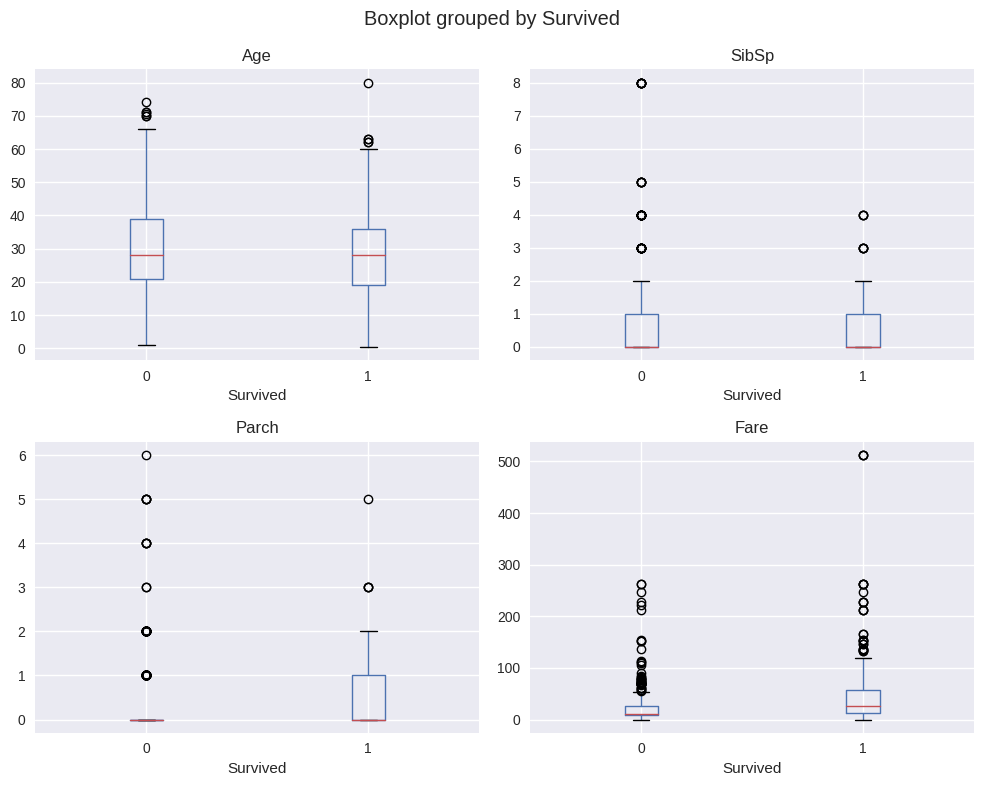

In [ ]:
# Plotting boxplots grouped by Survived
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
df_train_copy.boxplot(column=['Age'], by='Survived', ax=ax1)
df_train_copy.boxplot(column=['SibSp'], by='Survived', ax=ax2)
df_train_copy.boxplot(column=['Parch'], by='Survived', ax=ax3)
df_train_copy.boxplot(column=['Fare'], by='Survived', ax=ax4)
plt.tight_layout()
plt.show()

## Boxplot grouped by 'Pclass'

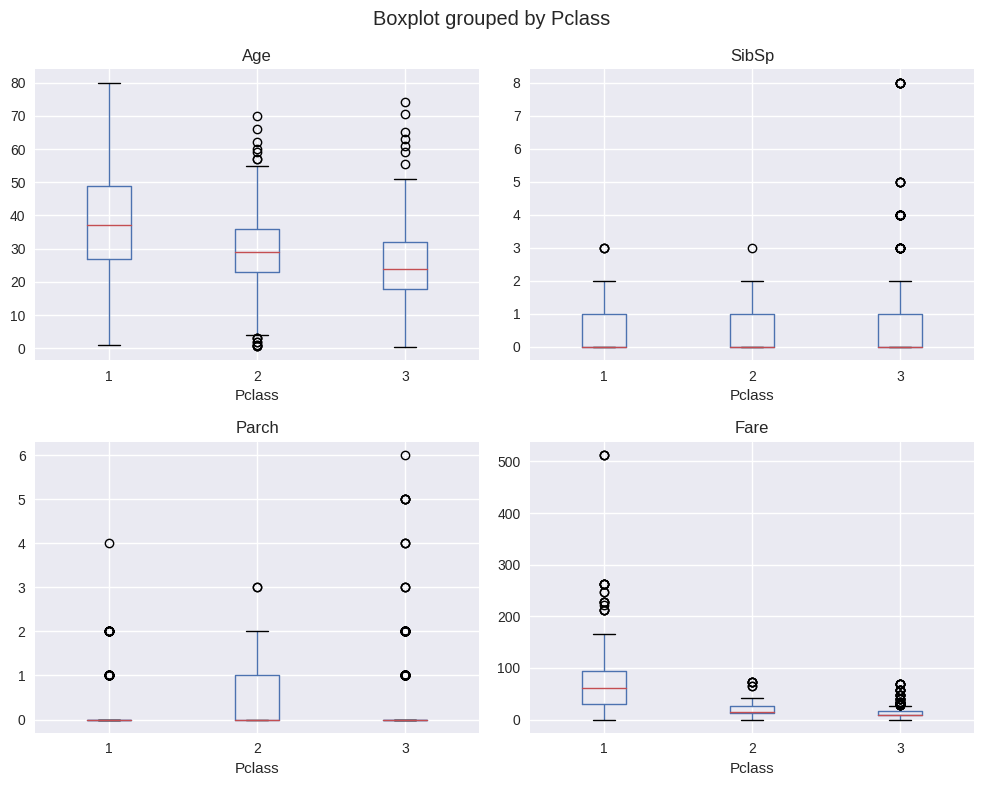

In [ ]:
# Plotting boxplots gouped by Pclass
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
df_train_copy.boxplot(column=['Age'], by='Pclass', ax=ax1)
df_train_copy.boxplot(column=['SibSp'], by='Pclass', ax=ax2)
df_train_copy.boxplot(column=['Parch'], by='Pclass', ax=ax3)
df_train_copy.boxplot(column=['Fare'], by='Pclass', ax=ax4)
plt.tight_layout()
plt.show()

## Boxplot grouped by 'Sex'

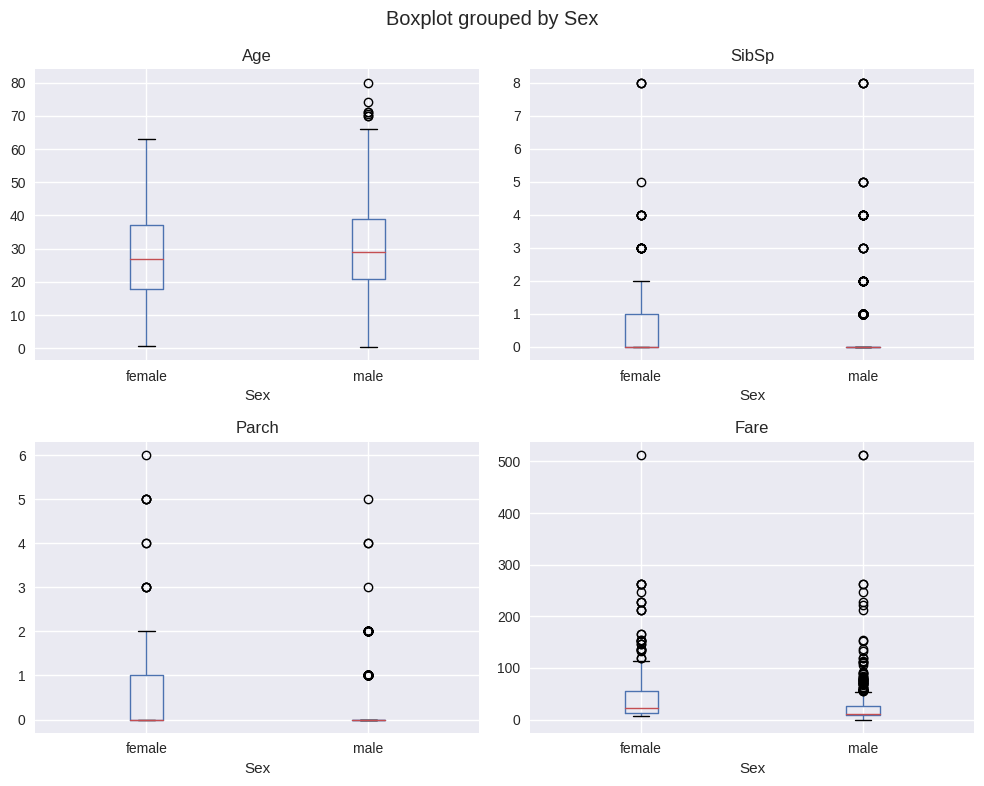

In [ ]:
# Plotting boxplots gouped by Sex
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
df_train_copy.boxplot(column=['Age'], by='Sex', ax=ax1)
df_train_copy.boxplot(column=['SibSp'], by='Sex', ax=ax2)
df_train_copy.boxplot(column=['Parch'], by='Sex', ax=ax3)
df_train_copy.boxplot(column=['Fare'], by='Sex', ax=ax4)
plt.tight_layout()
plt.show()

## Boxplot grouped by 'Embarked'

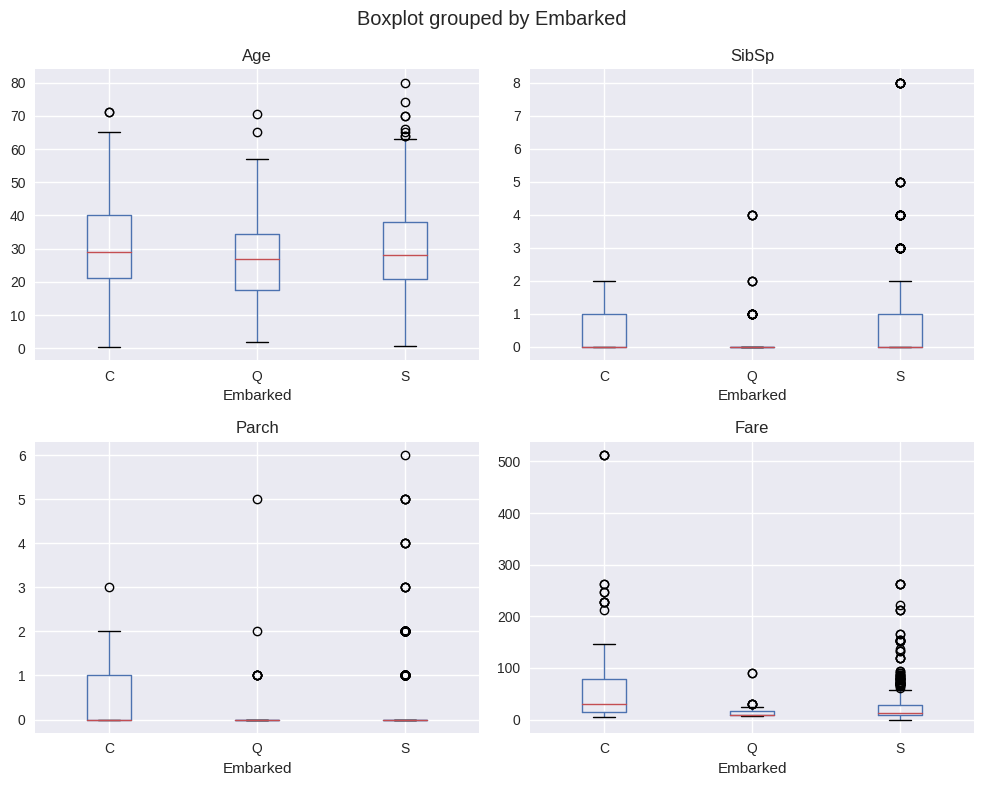

In [ ]:
# Plotting boxplots gouped by Embarked
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
df_train_copy.boxplot(column=['Age'], by='Embarked', ax=ax1)
df_train_copy.boxplot(column=['SibSp'], by='Embarked', ax=ax2)
df_train_copy.boxplot(column=['Parch'], by='Embarked', ax=ax3)
df_train_copy.boxplot(column=['Fare'], by='Embarked', ax=ax4)
plt.tight_layout()
plt.show()

## Correlation heatmap - Numerical features

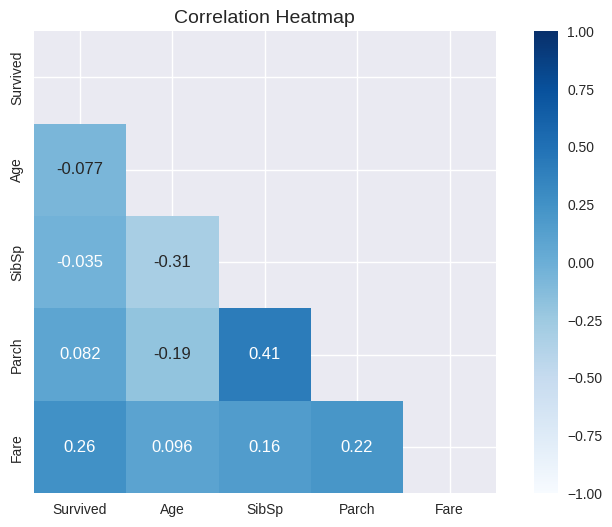

In [ ]:
# Plotting the correlation heatmap
import seaborn as sns
# Select only numeric columns for correlation calculation
numeric_columns = df_train_copy.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(numeric_columns.corr(), dtype = bool))
heatmap = sns.heatmap(numeric_columns.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Blues', square = True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14});

## Pairplot matrix, grouped by 'Survived'

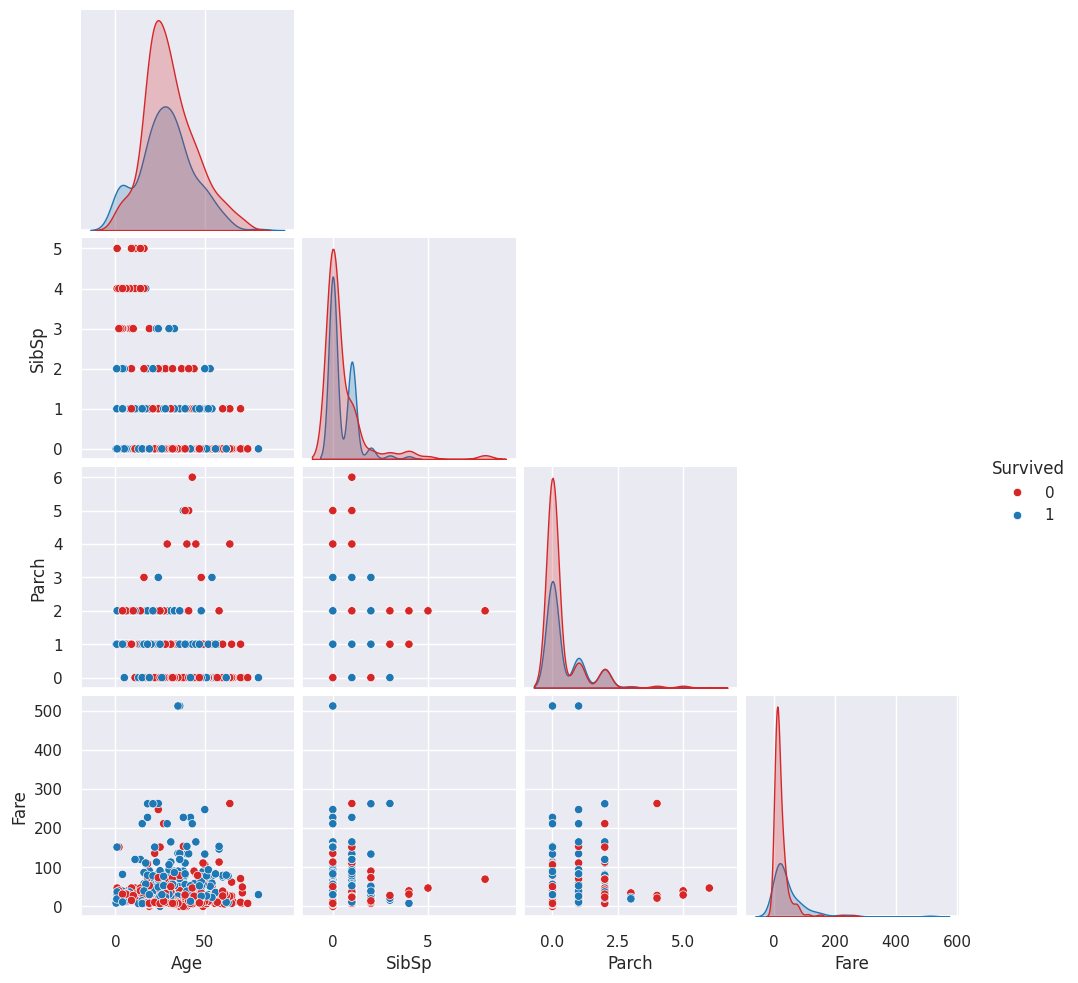

In [ ]:
# Plotting the pairplot matrix, by 'Survived'
sns.set(rc={'figure.figsize':(1, 1)})
palette = ['tab:red', 'tab:blue']
sns.pairplot(df_train_copy, hue="Survived", diag_kind="kde", palette = palette, corner = True)
plt.show()

## Pairplot matrix, grouped by 'Pclass'

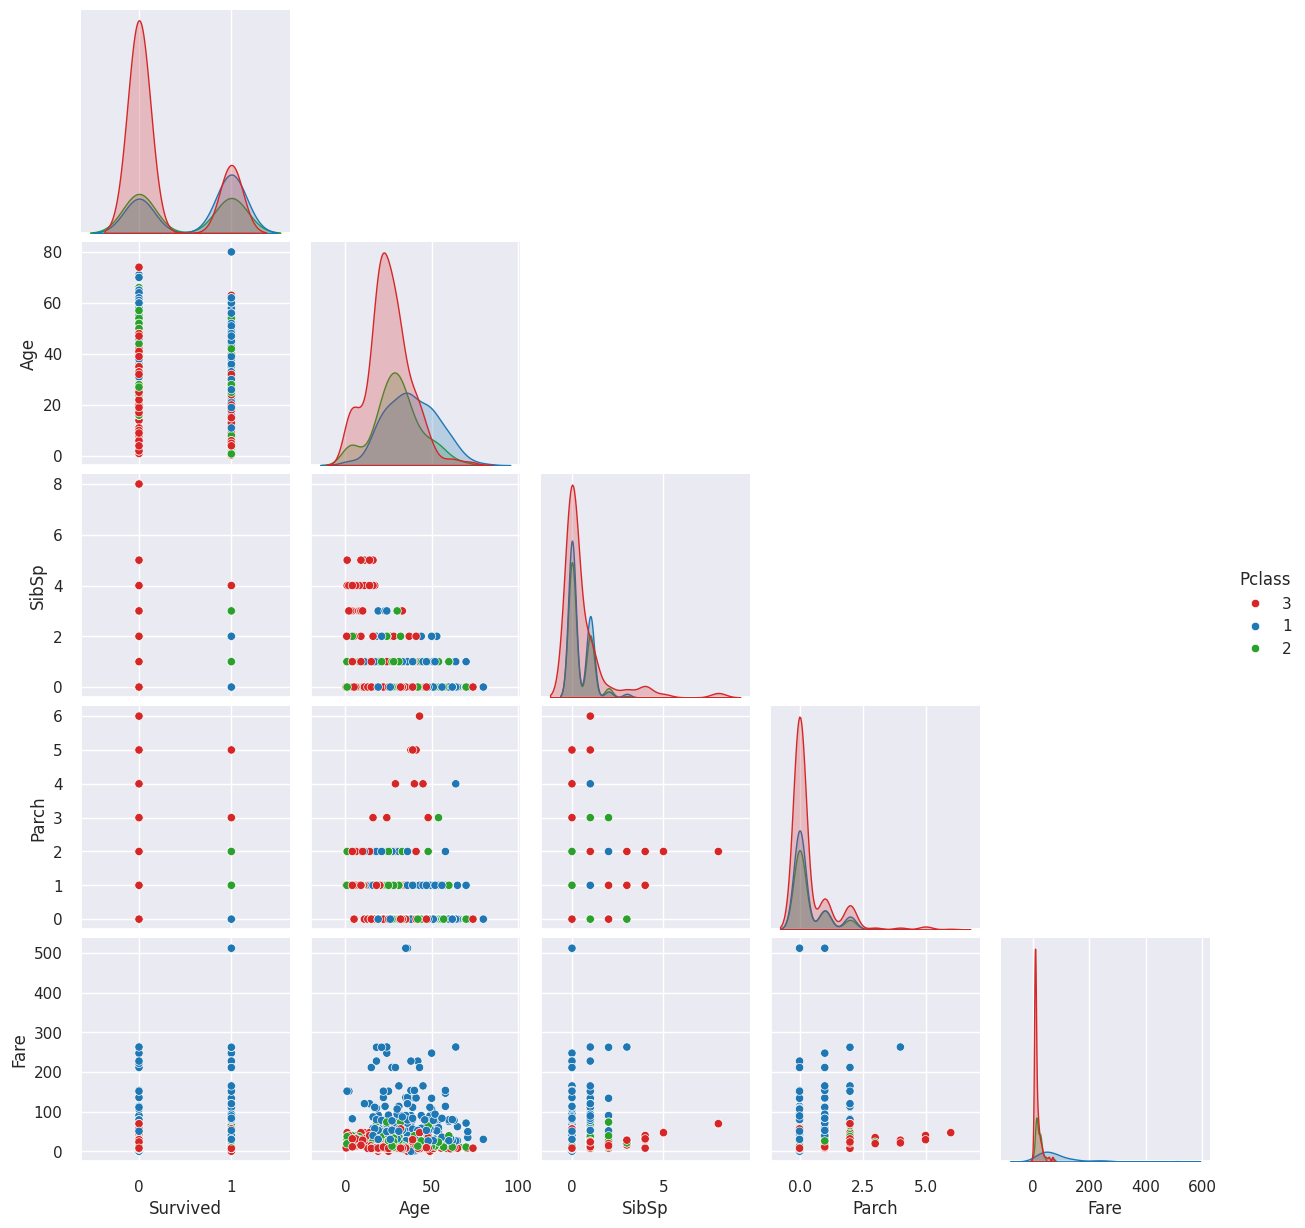

In [ ]:
# Plotting the pairplot matrix, by 'Pclass'
sns.set(rc={'figure.figsize':(1, 1)})
palette = ['tab:red', 'tab:blue', 'tab:green']
sns.pairplot(df_train_copy, hue="Pclass", diag_kind="kde", palette = palette, corner = True)
plt.show()

## Pairplot matrix, grouped by 'Sex'

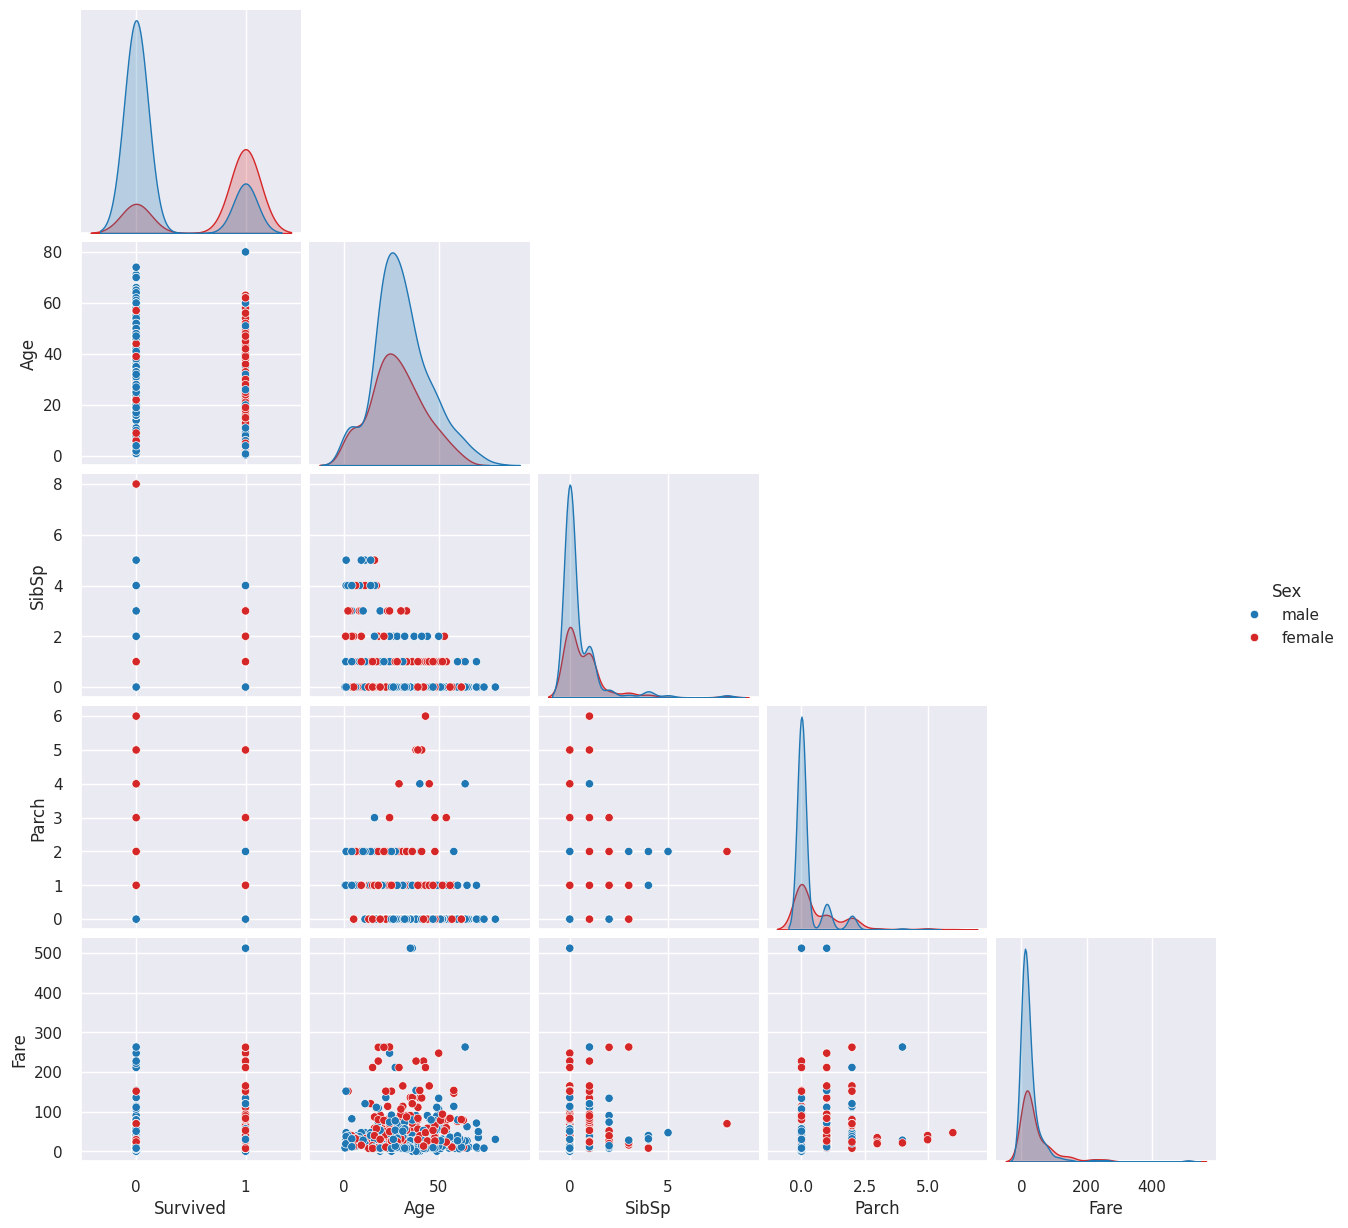

In [ ]:
# Plotting the pairplot matrix, by 'Sex'
sns.set(rc={'figure.figsize':(1, 1)})
palette = ['tab:blue', 'tab:red']
sns.pairplot(df_train_copy, hue="Sex", diag_kind="kde", palette = palette, corner = True)
plt.show()

## Pairplot matrix, grouped by 'Embarked'

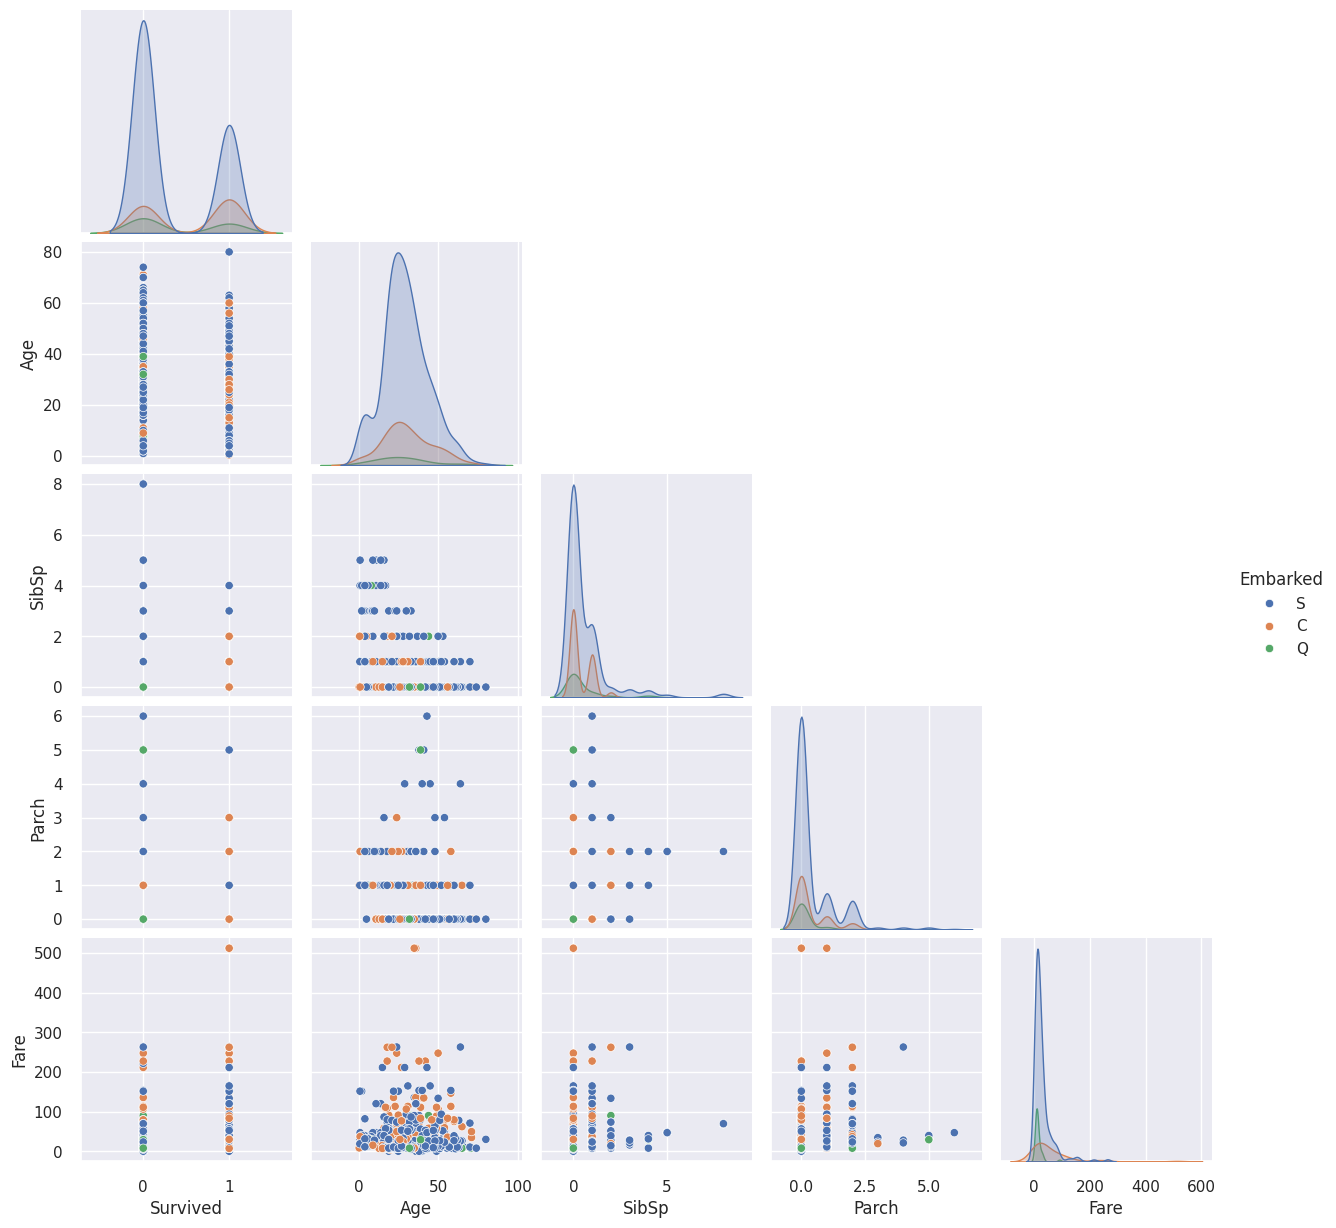

In [ ]:
# Plotting the pairplot matrix, by 'Embarked'
sns.set(rc={'figure.figsize':(1, 1)})
sns.pairplot(df_train_copy, hue="Embarked", diag_kind="kde", corner = True)
plt.show()

## Determining the % who survived by subcategory

In [ ]:
# % of passengers who survived, by 'Sex'
female = df_train_copy.loc[df_train_copy.Sex == 'female']["Survived"]
male = df_train_copy.loc[df_train_copy.Sex == 'male']["Survived"]
print("% of Sex_female who survived:", f"{sum(female)/len(female) * 100:.1f}")
print("% of Sex_male who survived:", f"{sum(male)/len(male) * 100:.1f}")

% of Sex_female who survived: 74.2
% of Sex_male who survived: 18.9


In [ ]:
# % of passengers who survived, by 'Pclass'
pclass_1 = df_train_copy.loc[df_train_copy.Pclass == '1']["Survived"]
pclass_2 = df_train_copy.loc[df_train_copy.Pclass == '2']["Survived"]
pclass_3 = df_train_copy.loc[df_train_copy.Pclass == '3']["Survived"]
print("% of Pclass_1 who survived:", f"{sum(pclass_1)/len(pclass_1) * 100:.1f}")
print("% of Pclass_2 who survived:", f"{sum(pclass_2)/len(pclass_2) * 100:.1f}")
print("% of Pclass_3 who survived:", f"{sum(pclass_3)/len(pclass_3) * 100:.1f}")

% of Pclass_1 who survived: 63.0
% of Pclass_2 who survived: 47.3
% of Pclass_3 who survived: 24.2


In [ ]:
# % of passengers who survived, by 'Embarked'
embarked_c = df_train_copy.loc[df_train_copy.Embarked == 'C']["Survived"]
embarked_q = df_train_copy.loc[df_train_copy.Embarked == 'Q']["Survived"]
embarked_s = df_train_copy.loc[df_train_copy.Embarked == 'S']["Survived"]
print("% of Embarked_C who survived:", f"{sum(embarked_c)/len(embarked_c) * 100:.1f}")
print("% of Embarked_Q who survived:", f"{sum(embarked_q)/len(embarked_q) * 100:.1f}")
print("% of Embarked_S who survived:", f"{sum(embarked_s)/len(embarked_s) * 100:.1f}")

% of Embarked_C who survived: 55.4
% of Embarked_Q who survived: 39.0
% of Embarked_S who survived: 33.7


# Defining training and validation datasets

In [ ]:
from sklearn.model_selection import train_test_split
y = df_train_copy['Survived']
X = df_train_copy.drop(['Survived'], axis=1)
X_test = df_test_copy
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((712, 7), (712,), (179, 7), (179,))

# Feature engineering

In [ ]:
# X_train_encoded = X_train.copy()
# X_val_encoded = X_val.copy()
# X_test_encoded = X_test.copy()

In [ ]:
# Target encoding all categorical variables
import category_encoders as ce
encoder = ce.TargetEncoder(cols=['Sex', 'Pclass', 'Embarked'])

X_train_encoded = encoder.fit_transform(X_train, y_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

In [ ]:
# Creating new variables
X_train_encoded['FamilySize'] = X_train_encoded['SibSp'] + X_train_encoded['Parch'] + 1
X_val_encoded['FamilySize'] = X_val_encoded['SibSp'] + X_val_encoded['Parch'] + 1
X_test_encoded['FamilySize'] = X_test_encoded['SibSp'] + X_test_encoded['Parch'] + 1

X_train_encoded['Sex_Pclass'] = X_train_encoded['Sex'] * X_train_encoded['Pclass']
X_val_encoded['Sex_Pclass'] = X_val_encoded['Sex'] * X_val_encoded['Pclass']
X_test_encoded['Sex_Pclass'] = X_test_encoded['Sex'] * X_test_encoded['Pclass']

X_train_encoded['Sex_Embarked'] = X_train_encoded['Sex'] * X_train_encoded['Embarked']
X_val_encoded['Sex_Embarked'] = X_val_encoded['Sex'] * X_val_encoded['Embarked']
X_test_encoded['Sex_Embarked'] = X_test_encoded['Sex'] * X_test_encoded['Embarked']

In [ ]:
X_train_encoded.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Sex_Pclass,Sex_Embarked
544,0.643678,0.204793,50.0,1,0,106.4250,0.570369,2,0.131821,0.116808
776,0.248705,0.204793,NaN,0,0,7.7500,0.393417,1,0.050933,0.080569
170,0.643678,0.204793,61.0,0,0,33.5000,0.343689,1,0.131821,0.070385
175,0.248705,0.204793,18.0,1,1,7.8542,0.343689,3,0.050933,0.070385
96,0.643678,0.204793,71.0,0,0,34.6542,0.570369,1,0.131821,0.116808


In [ ]:
X_test_encoded.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Sex_Pclass,Sex_Embarked
0,0.248705,0.204793,34.5,0,0,7.8292,0.393417,1,0.050933,0.080569
1,0.248705,0.731225,47.0,1,0,7.0000,0.343689,2,0.181859,0.251314
2,0.467105,0.204793,62.0,0,0,9.6875,0.393417,1,0.095660,0.080569
3,0.248705,0.204793,27.0,0,0,8.6625,0.343689,1,0.050933,0.070385
4,0.248705,0.731225,22.0,1,1,12.2875,0.343689,3,0.181859,0.251314


# Defining the preprocessing pipeline

In [ ]:
# Selecting categorical features
cat_cols = [c for c in X_train_encoded.columns if X_train_encoded[c].dtype == "object"]
# Selectig numerical features
num_cols = [n for n in X_train_encoded.columns if X_train_encoded[n].dtype in ['int64', 'float64']]
# As 'Survived' is the dependent variable, it will be removed from the numerical columns in order to define all preprocessing steps before training the models
print('Categorical columns:', cat_cols, '\n''Numerical columns:', num_cols)

Categorical columns: [] 
Numerical columns: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'Sex_Pclass', 'Sex_Embarked']


In [ ]:
# Preprocessing for numerical data
scaler = StandardScaler()
num_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy='median')),
                                    ('scaler', scaler)])

# Preprocessing for categorical data
cat_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                  ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output = False))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_cols),
                                               ('cat', cat_transformer, cat_cols)])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
                                  'Fare', 'Embarked', 'FamilySize',
                                  'Sex_Pclass', 'Sex_Embarked']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 [])])

# Training and testing candidate classifiers

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 22.5 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA

models= [DummyClassifier(random_state = 42),
         LogisticRegression(random_state = 42),
         KNeighborsClassifier(),
         DecisionTreeClassifier(random_state = 42),
         ExtraTreesClassifier(random_state = 42),
         GradientBoostingClassifier(random_state = 42),
         HistGradientBoostingClassifier(random_state = 42),
         BaggingClassifier(random_state = 42),
         lgb.LGBMClassifier(verbose = -100, random_state = 42),
         xgb.XGBClassifier(random_state = 42),
         CatBoostClassifier(verbose = False, random_state = 42),
         SVC(random_state = 42),
         GaussianNB(),
         AdaBoostClassifier(random_state = 42),
         RandomForestClassifier(random_state = 42),
        ]
def pca_dim_reduction(X, v):
  pca_pipeline = Pipeline(steps=[("preprocessor", preprocessor)])
  X_preproc = pca_pipeline.fit_transform(X)
  pca = PCA()
  X_pca = pca.fit_transform(X_preproc)
  total_exp_var = pca.explained_variance_ratio_.cumsum()
  n_over = len(total_exp_var[total_exp_var >= v])
  n_to = X_preproc.shape[1] - n_over + 1
  return n_to, total_exp_var

ac_train = []
ac_val = []
ps = []
rs = []
f1 = []
auc = []

n, var_expl = pca_dim_reduction(X_train_encoded, 0.9)
print('Number of features: {}\nTotal Variance Explained: {:.3f}'.format(n, var_expl[n-1]))

for model in models:
    pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                               ('pca', PCA(n_components = n)),
                               ("classifier", model)])

    cv = KFold(n_splits = 5)
    score = cross_val_score(pipeline, X_train_encoded, y_train, scoring = 'accuracy', cv = cv)
    ac_train.append(score.mean())
    y_hat = cross_val_predict(pipeline, X_val_encoded, y_val, cv = cv)
    ac_val.append(accuracy_score(y_val, y_hat))
    ps.append(precision_score(y_val, y_hat))
    rs.append(recall_score(y_val, y_hat))
    f1.append(f1_score(y_val, y_hat))
    auc.append(roc_auc_score(y_val, y_hat))

Number of features: 6
Total Variance Explained: 0.955


In [ ]:
# Retrieving model names from models list
model_names = []
for i, _ in enumerate(models):
  name = models[i].__class__.__name__
  model_names.append(name)

# Comparing Accuracy - Training Set

In [ ]:
# Building the accuracy comparison dataframe
df_ac_train = pd.DataFrame(zip(model_names, [i for i in np.round(ac_train, 3)]))
df_ac_train.rename(columns = {0: 'model', 1: 'Accuracy_training'}, inplace = True)
df_ac_train.set_index('model', drop = True, inplace = True)
df_ac_train = df_ac_train.sort_values(by = 'Accuracy_training')
df_ac_train

,Accuracy_training
model,
DummyClassifier,0.608
DecisionTreeClassifier,0.721
LGBMClassifier,0.733
XGBClassifier,0.743
HistGradientBoostingClassifier,0.749
ExtraTreesClassifier,0.754
RandomForestClassifier,0.756
BaggingClassifier,0.761
KNeighborsClassifier,0.774


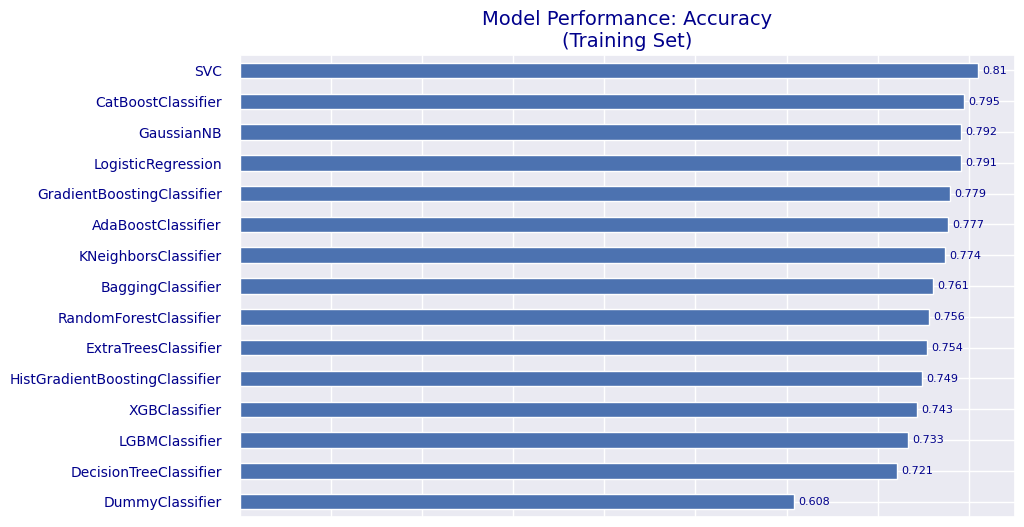

In [ ]:
# Plotting classifiers accuracy
fig, ax = plt.subplots(figsize = (10, 6))

df_ac_train.plot.barh(ax = ax)
ax.set_xticklabels('')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels(df_ac_train.index, fontsize = 10, color = 'darkblue')
ax.bar_label(ax.containers[0], fontsize = 8, color = 'darkblue', padding = 3)
ax.legend('')
ax.set_title('Model Performance: Accuracy\n(Training Set)', color = 'darkblue', fontsize = 14)
plt.show()

# Comparing Accuracy - Validation Set

In [ ]:
# Building the accuracy comparison dataframe
df_ac_val = pd.DataFrame(zip(model_names, [i for i in np.round(ac_val, 3)]))
df_ac_val.rename(columns = {0: 'model', 1: 'Accuracy_validation'}, inplace = True)
df_ac_val.set_index('model', drop = True, inplace = True)
df_ac_val = df_ac_val.sort_values(by = 'Accuracy_validation')
df_ac_val

,Accuracy_validation
model,
DummyClassifier,0.648
DecisionTreeClassifier,0.793
KNeighborsClassifier,0.804
GaussianNB,0.804
XGBClassifier,0.810
AdaBoostClassifier,0.810
LGBMClassifier,0.816
GradientBoostingClassifier,0.821
HistGradientBoostingClassifier,0.821


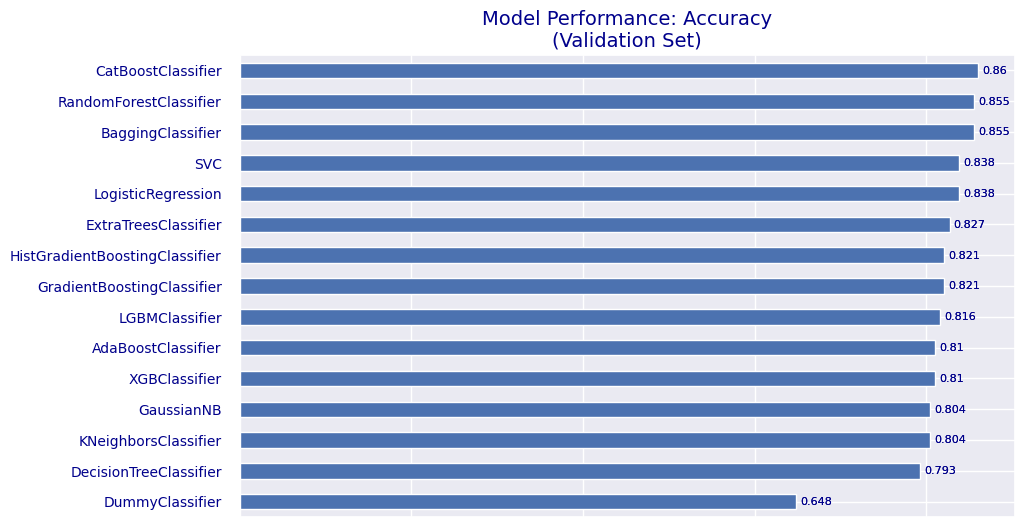

In [ ]:
# Plotting classifiers accuracy
fig, ax = plt.subplots(figsize = (10, 6))

df_ac_val.plot.barh(ax = ax)
ax.set_xticklabels('')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels(df_ac_val.index, fontsize = 10, color = 'darkblue')
ax.bar_label(ax.containers[0], fontsize = 8, color = 'darkblue', padding = 3)
ax.bar_label(ax.containers[0], fontsize = 8, color = 'darkblue', padding = 3)
ax.legend('')
ax.set_title('Model Performance: Accuracy\n(Validation Set)', color = 'darkblue', fontsize = 14)
plt.show()

# Comparing Precision - Validation Set

In [ ]:
# Building the accuracy comparison dataframe
df_ps = pd.DataFrame(zip(model_names, [i for i in np.round(ps, 3)]))
df_ps.rename(columns = {0: 'model', 1: 'Precision'}, inplace = True)
df_ps.set_index('model', drop = True, inplace = True)
df_ps = df_ps.sort_values(by = 'Precision')
df_ps

,Precision
model,
DummyClassifier,0.000
DecisionTreeClassifier,0.686
AdaBoostClassifier,0.746
GaussianNB,0.750
XGBClassifier,0.754
KNeighborsClassifier,0.759
ExtraTreesClassifier,0.767
GradientBoostingClassifier,0.772
LGBMClassifier,0.778


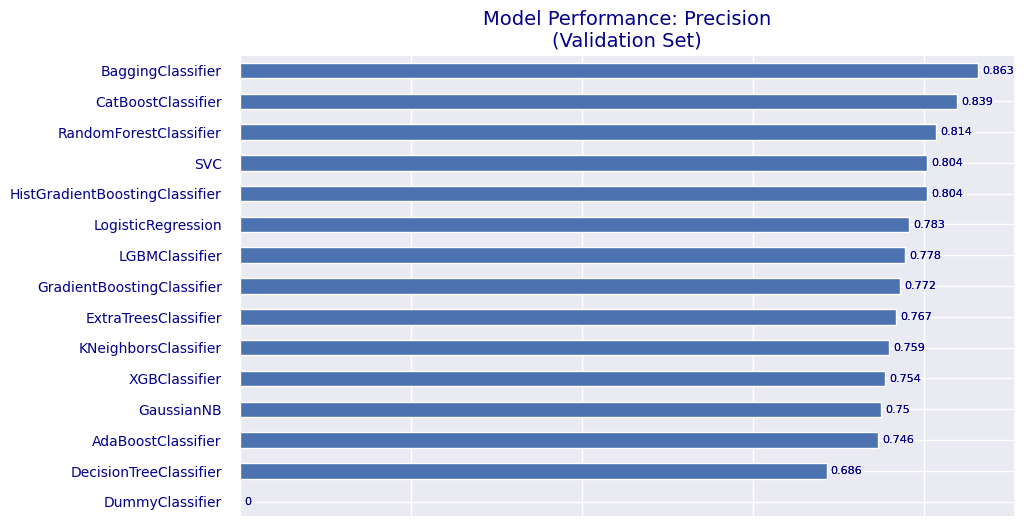

In [ ]:
# Plotting classifiers precision
fig, ax = plt.subplots(figsize = (10, 6))

df_ps.plot.barh(ax = ax)
ax.set_xticklabels('')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels(df_ps.index, fontsize = 10, color = 'darkblue')
ax.bar_label(ax.containers[0], fontsize = 8, color = 'darkblue', padding = 3)
ax.bar_label(ax.containers[0], fontsize = 8, color = 'darkblue', padding = 3)
ax.legend('')
ax.set_title('Model Performance: Precision\n(Validation Set)', color = 'darkblue', fontsize = 14)
plt.show()

# Comparing Recall - Validation Set

In [ ]:
# Building the accuracy comparison dataframe
df_rs = pd.DataFrame(zip(model_names, [i for i in np.round(rs, 3)]))
df_rs.rename(columns = {0: 'model', 1: 'Recall'}, inplace = True)
df_rs.set_index('model', drop = True, inplace = True)
df_rs = df_rs.sort_values(by = 'Recall')
df_rs

,Recall
model,
DummyClassifier,0.000
KNeighborsClassifier,0.651
HistGradientBoostingClassifier,0.651
LGBMClassifier,0.667
GaussianNB,0.667
XGBClassifier,0.683
GradientBoostingClassifier,0.698
BaggingClassifier,0.698
AdaBoostClassifier,0.698


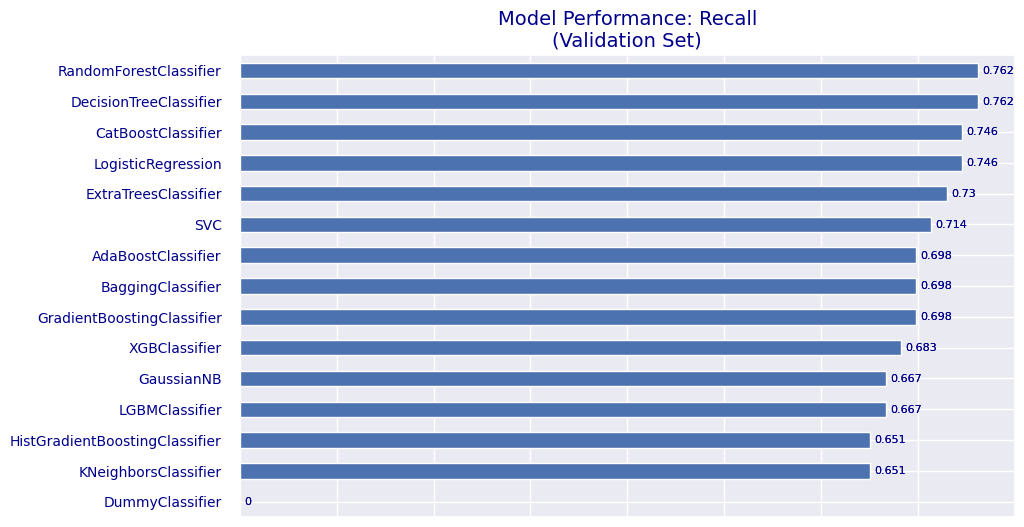

In [ ]:
# Plotting classifiers recall
fig, ax = plt.subplots(figsize = (10, 6))

df_rs.plot.barh(ax = ax)
ax.set_xticklabels('')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels(df_rs.index, fontsize = 10, color = 'darkblue')
ax.bar_label(ax.containers[0], fontsize = 8, color = 'darkblue', padding = 3)
ax.bar_label(ax.containers[0], fontsize = 8, color = 'darkblue', padding = 3)
ax.legend('')
ax.set_title('Model Performance: Recall\n(Validation Set)', color = 'darkblue', fontsize = 14)
plt.show()

# Comparing F1 score - Validation Set

In [ ]:
# Building the f1 score comparison dataframe
df_f1 = pd.DataFrame(zip(model_names, [i for i in np.round(f1, 3)]))
df_f1.rename(columns = {0: 'model', 1: 'f1 score'}, inplace = True)
df_f1.set_index('model', drop = True, inplace = True)
df_f1 = df_f1.sort_values(by = 'f1 score')
df_f1

,f1 score
model,
DummyClassifier,0.000
KNeighborsClassifier,0.701
GaussianNB,0.706
XGBClassifier,0.717
LGBMClassifier,0.718
HistGradientBoostingClassifier,0.719
AdaBoostClassifier,0.721
DecisionTreeClassifier,0.722
GradientBoostingClassifier,0.733


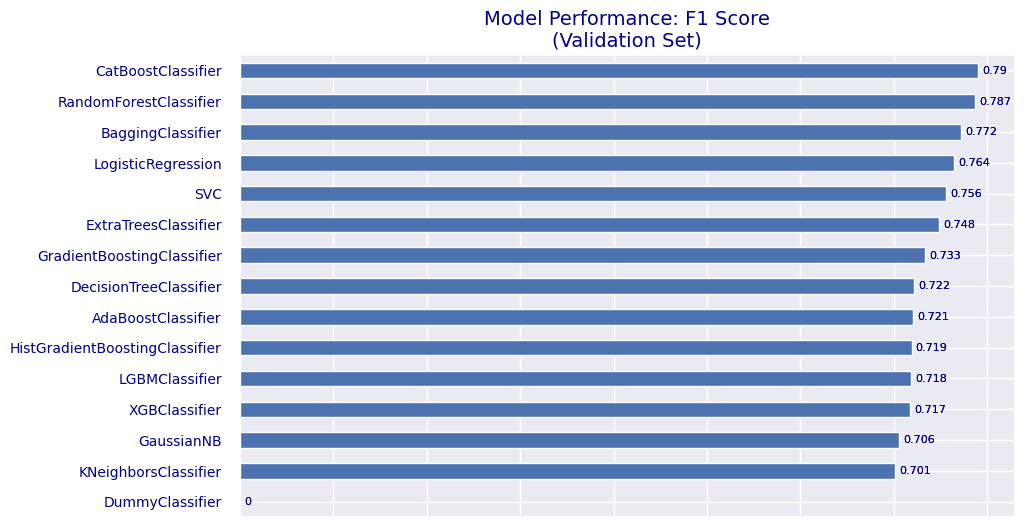

In [ ]:
# Plotting classifiers f1 score
fig, ax = plt.subplots(figsize = (10, 6))

df_f1.plot.barh(ax = ax)
ax.set_xticklabels('')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels(df_f1.index, fontsize = 10, color = 'darkblue')
ax.bar_label(ax.containers[0], fontsize = 8, color = 'darkblue', padding = 3)
ax.bar_label(ax.containers[0], fontsize = 8, color = 'darkblue', padding = 3)
ax.legend('')
ax.set_title('Model Performance: F1 Score\n(Validation Set)', color = 'darkblue', fontsize = 14)
plt.show()

# Comparing Area under Curve (AUC) - Validation Set

In [ ]:
# Building the f1 score comparison dataframe
df_auc = pd.DataFrame(zip(model_names, [i for i in np.round(auc, 3)]))
df_auc.rename(columns = {0: 'model', 1: 'auc'}, inplace = True)
df_auc.set_index('model', drop = True, inplace = True)
df_auc = df_auc.sort_values(by = 'auc')
df_auc

,auc
model,
DummyClassifier,0.500
KNeighborsClassifier,0.769
GaussianNB,0.773
XGBClassifier,0.781
HistGradientBoostingClassifier,0.782
LGBMClassifier,0.782
AdaBoostClassifier,0.785
DecisionTreeClassifier,0.786
GradientBoostingClassifier,0.793


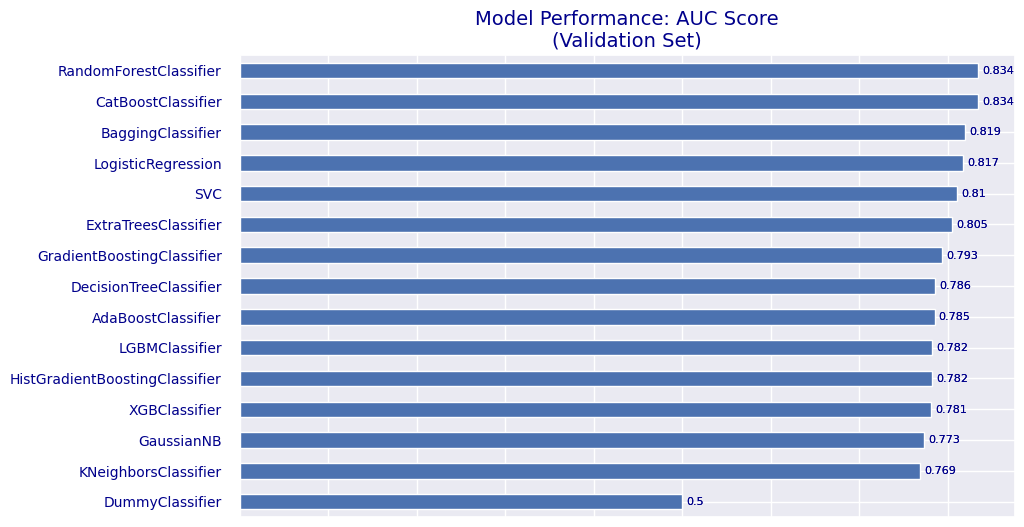

In [ ]:
# Plotting classifiers AUC score
fig, ax = plt.subplots(figsize = (10, 6))

df_auc.plot.barh(ax = ax)
ax.set_xticklabels('')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels(df_auc.index, fontsize = 10, color = 'darkblue')
ax.bar_label(ax.containers[0], fontsize = 8, color = 'darkblue', padding = 3)
ax.bar_label(ax.containers[0], fontsize = 8, color = 'darkblue', padding = 3)
ax.legend('')
ax.set_title('Model Performance: AUC Score\n(Validation Set)', color = 'darkblue', fontsize = 14)
plt.show()

# Hyperparameter Tuning (GridSearchCV)

In [ ]:
from sklearn.model_selection import GridSearchCV

## CatboostClassifier

In [ ]:
model = CatBoostClassifier(verbose = False, random_state = 42)
pipeline_CBC = Pipeline(steps=[("preprocessor", preprocessor),
                               (('pca', PCA(n_components = n))),
                               ("classifier", model)])

grid = {'classifier__learning_rate': [0.01, 0.05, 0.1],
        'classifier__iterations': [100, 200, 300],
        'classifier__depth':[3, 6, 8],
        'classifier__l2_leaf_reg': [2, 3, 5]
        }

grid_search = GridSearchCV(pipeline_CBC, param_grid = grid, cv = cv, n_jobs = -1, scoring = 'accuracy')
grid_search.fit(X_train_encoded, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare',
                                                                          'Embarked',
                                                                          'FamilySize',
                                                                          'Sex_Pclass',
                                                                          'Sex_Embarked']),
                                                                        ('cat',
                                                                         Pipeli...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         [])])),
                                       ('pca', PCA(n_components=6)),
                                       ('classifier',
                                        <catboost.core.CatBoostClassifier object at 0x796082ef9840>)]),
             n_jobs=-1,
             param_grid={'classifier__depth': [3, 6, 8],
                         'classifier__iterations': [100, 200, 300],
                         'classifier__l2_leaf_reg': [2, 3, 5],
                         'classifier__learning_rate': [0.01, 0.05, 0.1]},
             scoring='accuracy')

In [ ]:
# CatBoostClassifier: performance of the best params
CBC_param = grid_search.best_params_
y_hat = grid_search.best_estimator_.predict(X_val_encoded)
y_hat_test_CBC = grid_search.best_estimator_.predict(X_test_encoded)
print('Accuracy:', f'{accuracy_score(y_val, y_hat):.3f}')
print('Precision:', f'{precision_score(y_val, y_hat):.3f}')
print('Recall:', f'{recall_score(y_val, y_hat):.3f}')
print('F1 score:', f'{f1_score(y_val, y_hat):.3f}')
print('AUC:', f'{roc_auc_score(y_val, y_hat):.3f}')

Accuracy: 0.860
Precision: 0.828
Recall: 0.762
F1 score: 0.793
AUC: 0.838


## RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state = 42)
pipeline_RFC = Pipeline(steps=[("preprocessor", preprocessor),
                               (('pca', PCA(n_components = n))),
                               ("classifier", model)])

grid = {'classifier__n_estimators': [5, 20, 50, 100],
        'classifier__max_features': ['auto', 'sqrt'],
        'classifier__max_depth': [2, 5, 10],
        'classifier__min_samples_split': [2, 6, 10],
        'classifier__min_samples_leaf': [1, 3, 5],
        'classifier__bootstrap': [True, False]
        }

grid_search = GridSearchCV(pipeline_RFC, param_grid = grid, cv = cv, n_jobs = -1, scoring = 'accuracy')
grid_search.fit(X_train_encoded, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare',
                                                                          'Embarked',
                                                                          'FamilySize',
                                                                          'Sex_Pclass',
                                                                          'Sex_Embarked']),
                                                                        ('cat',
                                                                         Pipeli...
                                       ('pca', PCA(n_components=6)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__bootstrap': [True, False],
                         'classifier__max_depth': [2, 5, 10],
                         'classifier__max_features': ['auto', 'sqrt'],
                         'classifier__min_samples_leaf': [1, 3, 5],
                         'classifier__min_samples_split': [2, 6, 10],
                         'classifier__n_estimators': [5, 20, 50, 100]},
             scoring='accuracy')

In [ ]:
# RandomForestClassifier: performance of the best params
RFC_param = grid_search.best_params_
y_hat = grid_search.best_estimator_.predict(X_val_encoded)
y_hat_test_RFC = grid_search.best_estimator_.predict(X_test_encoded)
print('Accuracy:', f'{accuracy_score(y_val, y_hat):.3f}')
print('Precision:', f'{precision_score(y_val, y_hat):.3f}')
print('Recall:', f'{recall_score(y_val, y_hat):.3f}')
print('F1 score:', f'{f1_score(y_val, y_hat):.3f}')
print('AUC:', f'{roc_auc_score(y_val, y_hat):.3f}')

Accuracy: 0.855
Precision: 0.803
Recall: 0.778
F1 score: 0.790
AUC: 0.837


## GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier(random_state = 42)
pipeline_GBC = Pipeline(steps=[("preprocessor", preprocessor),
                               (('pca', PCA(n_components = n))),
                               ("classifier", model)])

grid = {'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7]
        }

grid_search = GridSearchCV(pipeline_GBC, param_grid = grid, cv = cv, n_jobs = -1, scoring = 'accuracy')
grid_search.fit(X_train_encoded, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare',
                                                                          'Embarked',
                                                                          'FamilySize',
                                                                          'Sex_Pclass',
                                                                          'Sex_Embarked']),
                                                                        ('cat',
                                                                         Pipeli...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         [])])),
                                       ('pca', PCA(n_components=6)),
                                       ('classifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# GradientBoostingClassifier: performance of the best params
GBC_param = grid_search.best_params_
y_hat = grid_search.best_estimator_.predict(X_val_encoded)
y_hat_test_GBC = grid_search.best_estimator_.predict(X_test_encoded)
print('Accuracy:', f'{accuracy_score(y_val, y_hat):.3f}')
print('Precision:', f'{precision_score(y_val, y_hat):.3f}')
print('Recall:', f'{recall_score(y_val, y_hat):.3f}')
print('F1 score:', f'{f1_score(y_val, y_hat):.3f}')
print('AUC:', f'{roc_auc_score(y_val, y_hat):.3f}')

Accuracy: 0.855
Precision: 0.814
Recall: 0.762
F1 score: 0.787
AUC: 0.834


## SVC

In [ ]:
model = SVC(random_state = 42)
pipeline_SVC = Pipeline(steps=[("preprocessor", preprocessor),
                               (('pca', PCA(n_components = n))),
                               ("classifier", model)])

grid = {'classifier__C': [10, 50, 100],
        'classifier__kernel': ['rbf', 'linear'],
        'classifier__gamma': [0.001, 0.0001]
        }

grid_search = GridSearchCV(pipeline_SVC, param_grid = grid, cv = cv, n_jobs = -1, scoring = 'accuracy')
grid_search.fit(X_train_encoded, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare',
                                                                          'Embarked',
                                                                          'FamilySize',
                                                                          'Sex_Pclass',
                                                                          'Sex_Embarked']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         [])])),
                                       ('pca', PCA(n_components=6)),
                                       ('classifier', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [10, 50, 100],
                         'classifier__gamma': [0.001, 0.0001],
                         'classifier__kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [ ]:
# SVC: performance of the best params
SVC_param = grid_search.best_params_
y_hat = grid_search.best_estimator_.predict(X_val_encoded)
y_hat_test_SVC = grid_search.best_estimator_.predict(X_test_encoded)
print('Accuracy:', f'{accuracy_score(y_val, y_hat):.3f}')
print('Precision:', f'{precision_score(y_val, y_hat):.3f}')
print('Recall:', f'{recall_score(y_val, y_hat):.3f}')
print('F1 score:', f'{f1_score(y_val, y_hat):.3f}')
print('AUC:', f'{roc_auc_score(y_val, y_hat):.3f}')

Accuracy: 0.849
Precision: 0.810
Recall: 0.746
F1 score: 0.777
AUC: 0.826


## HistGradientBoostingClassifier

In [ ]:
model = HistGradientBoostingClassifier(random_state = 42)
pipeline_HGBC = Pipeline(steps=[("preprocessor", preprocessor),
                                (('pca', PCA(n_components = n))),
                                ("classifier", model)])

grid = {'classifier__learning_rate': [0.01, 0.1, 1],
        'classifier__max_leaf_nodes': [3, 10, 30],
        'classifier__max_depth': [25, 50, 75]
        }

grid_search = GridSearchCV(pipeline_HGBC, param_grid = grid, cv = cv, n_jobs = -1, scoring = 'accuracy')
grid_search.fit(X_train_encoded, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare',
                                                                          'Embarked',
                                                                          'FamilySize',
                                                                          'Sex_Pclass',
                                                                          'Sex_Embarked']),
                                                                        ('cat',
                                                                         Pipeli...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         [])])),
                                       ('pca', PCA(n_components=6)),
                                       ('classifier',
                                        HistGradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 1],
                         'classifier__max_depth': [25, 50, 75],
                         'classifier__max_leaf_nodes': [3, 10, 30]},
             scoring='accuracy')

In [ ]:
# HistGradientBoostingClassifier: performance of the best params
HGBC_param = grid_search.best_params_
y_hat = grid_search.best_estimator_.predict(X_val_encoded)
y_hat_test_HGBC = grid_search.best_estimator_.predict(X_test_encoded)
print('Accuracy:', f'{accuracy_score(y_val, y_hat):.3f}')
print('Precision:', f'{precision_score(y_val, y_hat):.3f}')
print('Recall:', f'{recall_score(y_val, y_hat):.3f}')
print('F1 score:', f'{f1_score(y_val, y_hat):.3f}')
print('AUC:', f'{roc_auc_score(y_val, y_hat):.3f}')

Accuracy: 0.844
Precision: 0.807
Recall: 0.730
F1 score: 0.767
AUC: 0.818


## ExtraTreesClassifier

In [ ]:
model = ExtraTreesClassifier(random_state = 42)
pipeline_ETC = Pipeline(steps=[("preprocessor", preprocessor),
                               (('pca', PCA(n_components = n))),
                               ("classifier", model)])

grid = {'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [10, 20, 50],
        'classifier__min_samples_split': [10, 20, 50, 100],
        'classifier__min_samples_leaf': [10, 20, 50, 100],
        }

grid_search = GridSearchCV(pipeline_ETC, param_grid = grid, cv = cv, n_jobs = -1, scoring = 'accuracy')
grid_search.fit(X_train_encoded, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare',
                                                                          'Embarked',
                                                                          'FamilySize',
                                                                          'Sex_Pclass',
                                                                          'Sex_Embarked']),
                                                                        ('cat',
                                                                         Pipeli...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         [])])),
                                       ('pca', PCA(n_components=6)),
                                       ('classifier',
                                        ExtraTreesClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [10, 20, 50],
                         'classifier__min_samples_leaf': [10, 20, 50, 100],
                         'classifier__min_samples_split': [10, 20, 50, 100]},
             scoring='accuracy')

In [ ]:
# ExtraTreesClassifier: performance of the best params
ETC_param = grid_search.best_params_
y_hat = grid_search.best_estimator_.predict(X_val_encoded)
y_hat_test_ETC = grid_search.best_estimator_.predict(X_test_encoded)
print('Accuracy:', f'{accuracy_score(y_val, y_hat):.3f}')
print('Precision:', f'{precision_score(y_val, y_hat):.3f}')
print('Recall:', f'{recall_score(y_val, y_hat):.3f}')
print('F1 score:', f'{f1_score(y_val, y_hat):.3f}')
print('AUC:', f'{roc_auc_score(y_val, y_hat):.3f}')

Accuracy: 0.849
Precision: 0.821
Recall: 0.730
F1 score: 0.773
AUC: 0.822


## Logistic Regression

In [ ]:
model = LogisticRegression(random_state = 42)
pipeline_LR = Pipeline(steps=[("preprocessor", preprocessor),
                              (('pca', PCA(n_components = n))),
                              ("classifier", model)])

grid = {'classifier__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
        'classifier__solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
        'classifier__max_iter' : [100, 1000, 2500, 5000],
        'classifier__C': [0.1, 1, 10],
        }

grid_search = GridSearchCV(pipeline_LR, param_grid = grid, cv = cv, n_jobs = -1, scoring = 'accuracy')
grid_search.fit(X_train_encoded, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare',
                                                                          'Embarked',
                                                                          'FamilySize',
                                                                          'Sex_Pclass',
                                                                          'Sex_Embarked']),
                                                                        ('cat',
                                                                         Pipeli...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         [])])),
                                       ('pca', PCA(n_components=6)),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__max_iter': [100, 1000, 2500, 5000],
                         'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                 'none'],
                         'classifier__solver': ['lbfgs', 'newton-cg',
                                                'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [ ]:
# LogisticRegression: performance of the best params
LR_param = grid_search.best_params_
y_hat = grid_search.best_estimator_.predict(X_val_encoded)
y_hat_test_LR = grid_search.best_estimator_.predict(X_test_encoded)
print('Accuracy:', f'{accuracy_score(y_val, y_hat):.3f}')
print('Precision:', f'{precision_score(y_val, y_hat):.3f}')
print('Recall:', f'{recall_score(y_val, y_hat):.3f}')
print('F1 score:', f'{f1_score(y_val, y_hat):.3f}')
print('AUC:', f'{roc_auc_score(y_val, y_hat):.3f}')

Accuracy: 0.844
Precision: 0.787
Recall: 0.762
F1 score: 0.774
AUC: 0.825


## KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier()
pipeline_KNC = Pipeline(steps=[("preprocessor", preprocessor),
                               (('pca', PCA(n_components = n))),
                               ("classifier", model)])

grid = {'classifier__n_neighbors' : [5, 7, 9, 11, 13, 15],
        'classifier__weights' : ['uniform','distance'],
        'classifier__metric' : ['minkowski','euclidean','manhattan']
        }

grid_search = GridSearchCV(pipeline_KNC, param_grid = grid, cv = cv, n_jobs = -1, scoring = 'accuracy')
grid_search.fit(X_train_encoded, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare',
                                                                          'Embarked',
                                                                          'FamilySize',
                                                                          'Sex_Pclass',
                                                                          'Sex_Embarked']),
                                                                        ('cat',
                                                                         Pipeli...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         [])])),
                                       ('pca', PCA(n_components=6)),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__metric': ['minkowski', 'euclidean',
                                                'manhattan'],
                         'classifier__n_neighbors': [5, 7, 9, 11, 13, 15],
                         'classifier__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# KNeighborsClassifier: performance of the best params
KNC_param = grid_search.best_params_
y_hat = grid_search.best_estimator_.predict(X_val_encoded)
y_hat_test_KNC = grid_search.best_estimator_.predict(X_test_encoded)
print('Accuracy:', f'{accuracy_score(y_val, y_hat):.3f}')
print('Precision:', f'{precision_score(y_val, y_hat):.3f}')
print('Recall:', f'{recall_score(y_val, y_hat):.3f}')
print('F1 score:', f'{f1_score(y_val, y_hat):.3f}')
print('AUC:', f'{roc_auc_score(y_val, y_hat):.3f}')

Accuracy: 0.877
Precision: 0.873
Recall: 0.762
F1 score: 0.814
AUC: 0.851


## Gathering the predictions for the test set, generated by each optimized classifier

In [ ]:
# Gathering the predictions for the test set, generated by each optimized classifier
y_hat_test_consolidated = np.stack([y_hat_test_CBC,
                                    y_hat_test_RFC,
                                    y_hat_test_GBC,
                                    y_hat_test_SVC,
                                    y_hat_test_HGBC,
                                    y_hat_test_ETC,
                                    y_hat_test_LR,
                                    y_hat_test_KNC]).T

y_hat_test_consolidated.shape

(418, 8)

# Ensembling the selected classifiers with their respective best hyperparameters   

In [ ]:
models_best_params= [CatBoostClassifier(verbose = False,
                            random_state = 42,
                            learning_rate = CBC_param.get('classifier__learning_rate'),
                            iterations =  CBC_param.get('classifier__iterations'),
                            depth = CBC_param.get('classifier__depth'),
                            l2_leaf_reg = CBC_param.get('classifier__l2_leaf_reg')),

                     RandomForestClassifier(random_state = 42,
                                            n_estimators = RFC_param.get('classifier__n_estimators'),
                                            max_features = RFC_param.get('classifier__max_features'),
                                            max_depth = RFC_param.get('classifier__max_depth'),
                                            min_samples_split = RFC_param.get('classifier__min_samples_split'),
                                            min_samples_leaf = RFC_param.get('classifier__min_samples_leaf'),
                                            bootstrap = RFC_param.get('classifier__bootstrap')),

                      GradientBoostingClassifier(random_state =42,
                                                 n_estimators = GBC_param.get('classifier__n_estimators'),
                                                 learning_rate = GBC_param.get('classifier__learning_rate'),
                                                 max_depth = GBC_param.get('classifier__max_depth')),

                      # SVC(random_state = 42,
                      #     probability = True,
                      #     C = SVC_param.get('classifier__C'),
                      #     kernel = SVC_param.get('classifier__kernel'),
                      #     gamma = SVC_param.get('classifier__gamma')),

                      HistGradientBoostingClassifier(random_state = 42,
                                                     learning_rate = HGBC_param.get('classifier__learning_rate'),
                                                     max_leaf_nodes = HGBC_param.get('classifier__max_leaf_nodes'),
                                                     max_depth = HGBC_param.get('classifier__max_depth')),

                      ExtraTreesClassifier(random_state = 42,
                                           criterion = ETC_param.get('classifier__criterion'),
                                           max_depth = ETC_param.get('classifier__max_depth'),
                                           min_samples_split = ETC_param.get('classifier__min_samples_split'),
                                           min_samples_leaf = ETC_param.get('classifier__min_samples_leaf')),

                      LogisticRegression(random_state = 42,
                                         penalty = LR_param.get('classifier__penalty'),
                                         solver = LR_param.get('classifier__solver'),
                                         max_iter = LR_param.get('classifier__max_iter'),
                                         C = LR_param.get('classifier__C')),

                      KNeighborsClassifier(n_neighbors = KNC_param.get('classifier__n_neighbors'),
                                           weights = KNC_param.get('classifier__weights'),
                                           metric = KNC_param.get('classifier__metric'))
        ]

## Majority voting

In [ ]:
from scipy.stats import mode
preds_stacked = []
for model in models_best_params:
  pipe = Pipeline(steps=[("preprocessor", preprocessor),
                         ('pca', PCA(n_components = n)),
                         ('classifier', model)])
  pipe.fit(X_train_encoded, y_train)
  preds = pipe.predict(X_val_encoded)
  preds_stacked.append(preds)
  acc = accuracy_score(y_val, preds)
  print(f"Accuracy for model {model.__class__.__name__}: {acc:0.3f}")
preds_stacked = np.array(preds_stacked)
maj_voting = np.apply_along_axis(mode, 0, preds_stacked)[0,:]
maj_voting_accuray = accuracy_score(y_val, maj_voting)
print('------------------------------------------------\n'
      f'Accuracy for majority voting: {maj_voting_accuray:0.3f}')

Accuracy for model CatBoostClassifier: 0.860
Accuracy for model RandomForestClassifier: 0.855
Accuracy for model GradientBoostingClassifier: 0.855
Accuracy for model HistGradientBoostingClassifier: 0.844
Accuracy for model ExtraTreesClassifier: 0.849
Accuracy for model LogisticRegression: 0.844
Accuracy for model KNeighborsClassifier: 0.877
------------------------------------------------
Accuracy for majority voting: 0.855


## Blending

In [ ]:
# Creating blend and holdaout datasets
X_blend, X_holdout, y_blend, y_holdout = train_test_split(X_train_encoded, y_train, test_size = 0.25, random_state = 42)
X_blend.shape, X_holdout.shape, y_blend.shape, y_holdout.shape

((534, 10), (178, 10), (534,), (178,))

### Blender: LogisticRegression

In [ ]:
from sklearn.preprocessing import StandardScaler

proba = []

for model in models_best_params:
  pipe = Pipeline(steps=[("preprocessor", preprocessor),
                         ('pca', PCA(n_components = n)),
                         ('classifier', model)])
  pipe.fit(X_blend, y_blend)
  p = pipe.predict_proba(X_holdout)[:, 1]
  proba.append(p)

proba = np.array(proba).T
scaler = StandardScaler()
proba = scaler.fit_transform(proba)
proba.shape

(178, 7)

In [ ]:
blender = LogisticRegression(solver = 'liblinear', random_state = 42)
blender.fit(proba, y_holdout)
coefficients = [f'{c:.3f}' for c in blender.coef_[0]]
print(f'Blender coefficients: {coefficients}')

val_proba = []

for model in models_best_params:
  pipe = Pipeline(steps=[("preprocessor", preprocessor),
                         ('pca', PCA(n_components = n)),
                         ('classifier', model)])
  pipe.fit(X_holdout, y_holdout)
  p_val = pipe.predict_proba(X_val_encoded)[:, 1]
  val_proba.append(p_val)
val_proba = np.array(val_proba).T
val_proba = scaler.fit_transform(val_proba)

blending_proba = blender.predict_proba(val_proba)[:, 1]
blending = (blending_proba > 0.5).astype(int) # Convert probabilities to binary predictions
acc_blending = accuracy_score(y_val, y_pred = blending)
ras = roc_auc_score(y_val, y_score = blending)
print(f"Accuracy for the linear blending {blender.__class__.__name__}: {acc_blending:.3f}")
ras = roc_auc_score(y_val, y_score = blending)
print(f"ROC-AUC for the linear blending {blender.__class__.__name__}: {ras:.3f}")

Blender coefficients: ['0.288', '0.446', '0.037', '0.339', '-0.304', '0.116', '0.731']
Accuracy for the linear blending LogisticRegression: 0.827
ROC-AUC for the linear blending LogisticRegression: 0.808


In [ ]:
val_proba.shape

(179, 7)

### Blender: RandomForestClassifier

In [ ]:
blender = RandomForestClassifier(random_state = 42)
blender.fit(proba, y_holdout)
blending_proba = blender.predict_proba(val_proba)[:, 1]
blending = (blending_proba > 0.5).astype(int) # Convert probabilities to binary predictions
acc_blending = accuracy_score(y_val, y_pred=blending)
print(f"Accuracy for the non-linear blending {blender.__class__.__name__}: {acc_blending:.3f}")
ras = roc_auc_score(y_val, y_score=blending)
print(f"ROC-AUC for the non-linear blending {blender.__class__.__name__} is: {ras:0.3f}")

Accuracy for the non-linear blending RandomForestClassifier: 0.782
ROC-AUC for the non-linear blending RandomForestClassifier is: 0.767


### Blender: CatBoostClassifier

In [ ]:
blender = CatBoostClassifier(verbose = False, random_state = 42)
blender.fit(proba, y_holdout)
blending_proba = blender.predict_proba(val_proba)[:, 1]
blending = (blending_proba > 0.5).astype(int) # Convert probabilities to binary predictions
acc_blending = accuracy_score(y_val, y_pred=blending)
print(f"Accuracy for the non-linear blending {blender.__class__.__name__}: {acc_blending:.3f}")
ras = roc_auc_score(y_val, y_score=blending)
print(f"ROC-AUC for the non-linear blending {blender.__class__.__name__} is: {ras:.3f}")

Accuracy for the non-linear blending CatBoostClassifier: 0.793
ROC-AUC for the non-linear blending CatBoostClassifier is: 0.786


### Ensemble selection

In [ ]:
iterations = 10
baseline = 0.5
print(f"starting baseline is {baseline:0.5f}")

m = []
for i in range(iterations):
    challengers = list()
    for j in range(val_proba.shape[1]):
        new_proba = np.stack(val_proba[:, m + [j]])
        score = roc_auc_score(y_true = y_val,
                              y_score=np.mean(new_proba, axis=1))
        challengers.append([score, j])

    challengers = sorted(challengers, key=lambda x: x[0],
                         reverse=True)
    best_score, best_model = challengers[0]
    if best_score > baseline:
        print(f"Adding model_{best_model+1} to the ensemble",
              end=': ')
        print(f"ROC-AUC increases score to {best_score:0.5f}")
        m.append(best_model)
        baseline = best_score
    else:
        print("Cannot improve further - Stopping")

starting baseline is 0.50000
Adding model_6 to the ensemble: ROC-AUC increases score to 0.88300
Adding model_7 to the ensemble: ROC-AUC increases score to 0.88903
Adding model_1 to the ensemble: ROC-AUC increases score to 0.89245
Adding model_7 to the ensemble: ROC-AUC increases score to 0.89299
Adding model_6 to the ensemble: ROC-AUC increases score to 0.89532
Cannot improve further - Stopping
Cannot improve further - Stopping
Cannot improve further - Stopping
Cannot improve further - Stopping
Cannot improve further - Stopping


In [ ]:
# Coounting how many times each model has been inserted into the average and calculating the weights for the averaging on the test set
from collections import Counter
freqs = Counter(m)
weights = {key: round(freq/len(m), 3) for key, freq in freqs.items()}
print(weights)

{5: 0.4, 6: 0.4, 0: 0.2}


## Stacking via scikit-learn StackingClassifier

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
models_tuples = [('cbc', CatBoostClassifier(verbose = False,
                            random_state = 42,
                            learning_rate = CBC_param.get('classifier__learning_rate'),
                            iterations =  CBC_param.get('classifier__iterations'),
                            depth = CBC_param.get('classifier__depth'),
                            l2_leaf_reg = CBC_param.get('classifier__l2_leaf_reg'))),

                  ('rfc', RandomForestClassifier(random_state = 42,
                                            n_estimators = RFC_param.get('classifier__n_estimators'),
                                            max_features = RFC_param.get('classifier__max_features'),
                                            max_depth = RFC_param.get('classifier__max_depth'),
                                            min_samples_split = RFC_param.get('classifier__min_samples_split'),
                                            min_samples_leaf = RFC_param.get('classifier__min_samples_leaf'),
                                            bootstrap = RFC_param.get('classifier__bootstrap'))),

                  ('gbc', GradientBoostingClassifier(random_state =42,
                                                 n_estimators = GBC_param.get('classifier__n_estimators'),
                                                 learning_rate = GBC_param.get('classifier__learning_rate'),
                                                 max_depth = GBC_param.get('classifier__max_depth'))),

                  ('svc', SVC(random_state = 42,
                          probability = True,
                          C = SVC_param.get('classifier__C'),
                          kernel = SVC_param.get('classifier__kernel'),
                          gamma = SVC_param.get('classifier__gamma'))),

                  ('hgb', HistGradientBoostingClassifier(random_state = 42,
                                                     learning_rate = HGBC_param.get('classifier__learning_rate'),
                                                     max_leaf_nodes = HGBC_param.get('classifier__max_leaf_nodes'),
                                                     max_depth = HGBC_param.get('classifier__max_depth'))),

                  ('etc', ExtraTreesClassifier(random_state = 42,
                                           criterion = ETC_param.get('classifier__criterion'),
                                           max_depth = ETC_param.get('classifier__max_depth'),
                                           min_samples_split = ETC_param.get('classifier__min_samples_split'),
                                           min_samples_leaf = ETC_param.get('classifier__min_samples_leaf'))),

                  ('lr', LogisticRegression(random_state = 42,
                                         penalty = LR_param.get('classifier__penalty'),
                                         solver = LR_param.get('classifier__solver'),
                                         max_iter = LR_param.get('classifier__max_iter'),
                                         C = LR_param.get('classifier__C'))),

                  ('knn',   KNeighborsClassifier(n_neighbors = KNC_param.get('classifier__n_neighbors'),
                                           weights = KNC_param.get('classifier__weights'),
                                           metric = KNC_param.get('classifier__metric')))]

In [ ]:
# Defining the estimators and the base models
classifiers = models_tuples
# define meta learner model
base_model = SVC(random_state = 42)
# define the stacking ensemble
m_stack = StackingClassifier(estimators = classifiers, final_estimator = base_model, cv = cv, passthrough = True)

# Evaluating the estimator models

for _, m in models_tuples:
  pipe = Pipeline(steps=[("preprocessor", preprocessor),
                         ('pca', PCA(n_components = n)),
                         ('classifier', m)])
  pipe.fit(X_train_encoded, y_train)
  y_hat = pipe.predict(X_val_encoded)
  acc = accuracy_score(y_val, y_hat)
  print('%s accuracy: %.3f' % (m.__class__.__name__, acc))

# Evaluating the Stacking Classifier
pipe_stack = Pipeline(steps=[("preprocessor", preprocessor),
                         ('pca', PCA(n_components = n)),
                         ('classifier', m_stack)])
pipe_stack.fit(X_train_encoded, y_train)
y_hat_stacking = pipe_stack.predict(X_val_encoded)
acc_stack = accuracy_score(y_val, y_hat_stacking)
print('------------------------------------------\n'
      f'Stacking classifier accuracy: {acc_stack:.3f}')

CatBoostClassifier accuracy: 0.860
RandomForestClassifier accuracy: 0.855
GradientBoostingClassifier accuracy: 0.855
SVC accuracy: 0.849
HistGradientBoostingClassifier accuracy: 0.844
ExtraTreesClassifier accuracy: 0.849
LogisticRegression accuracy: 0.844
KNeighborsClassifier accuracy: 0.877
------------------------------------------
Stacking classifier accuracy: 0.860


## BaggingClassifier - Hyperparameter tuning

In [ ]:
model = BaggingClassifier(random_state = 42)
pipeline_BC = Pipeline(steps=[("preprocessor", preprocessor),
                               (('pca', PCA(n_components = n))),
                               ("classifier", model)])

grid = {'classifier__estimator': [RandomForestClassifier()],
        'classifier__n_estimators': [50],
        'classifier__bootstrap':[True, False],
        'classifier__bootstrap_features': [True, False],
        }

grid_search = GridSearchCV(pipeline_BC, param_grid = grid, cv = cv, n_jobs = -1, scoring = 'accuracy')
grid_search.fit(X_train_encoded, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=RandomState(MT19937) at 0x7960D0487240,
   shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare',
                                                                          'Embarked',
                                                                          'FamilySize',
                                                                          'Sex_Pclass...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         [])])),
                                       ('pca', PCA(n_components=6)),
                                       ('classifier',
                                        BaggingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__bootstrap': [True, False],
                         'classifier__bootstrap_features': [True, False],
                         'classifier__estimator': [RandomForestClassifier()],
                         'classifier__n_estimators': [50]},
             scoring='accuracy')

In [ ]:
# BaggingClassifier: performance of the best params
BC_param = grid_search.best_params_
y_hat = grid_search.best_estimator_.predict(X_val_encoded)
y_hat_test_BC = grid_search.best_estimator_.predict(X_test_encoded)
print('Parameters of the best model:', BC_param)
print('Accuracy:', f'{accuracy_score(y_val, y_hat):.3f}')
print('Precision:', f'{precision_score(y_val, y_hat):.3f}')
print('Recall:', f'{recall_score(y_val, y_hat):.3f}')
print('F1 score:', f'{f1_score(y_val, y_hat):.3f}')
print('AUC:', f'{roc_auc_score(y_val, y_hat):.3f}')

Parameters of the best model: {'classifier__bootstrap': True, 'classifier__bootstrap_features': False, 'classifier__estimator': RandomForestClassifier(), 'classifier__n_estimators': 50}
Accuracy: 0.855
Precision: 0.803
Recall: 0.778
F1 score: 0.790
AUC: 0.837


# **Conclusion**

### Only Majority Voting and Stacking ensembles replicated the performance of the best model (Catboostclassifier), considering the accuracy score

# Preparing the submission file

In [105]:
# Concatenating the training and validation sets
X_train_concatenated = pd.concat([X_train_encoded, X_val_encoded], axis = 0, ignore_index = True)
y_train_concatenated = pd.concat([y_train, y_val], axis = 0, ignore_index = True)
X_train_concatenated.shape, y_train_concatenated.shape

((891, 10), (891,))

In [106]:
X_train_concatenated.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Sex_Pclass,Sex_Embarked
0,0.643678,0.204793,50.0,1,0,106.4250,0.570369,2,0.131821,0.116808
1,0.248705,0.204793,NaN,0,0,7.7500,0.393417,1,0.050933,0.080569
2,0.643678,0.204793,61.0,0,0,33.5000,0.343689,1,0.131821,0.070385
3,0.248705,0.204793,18.0,1,1,7.8542,0.343689,3,0.050933,0.070385
4,0.643678,0.204793,71.0,0,0,34.6542,0.570369,1,0.131821,0.116808


In [107]:
# Using the majority voting to generate te final predictions on the test set
pred_test_stacked = []
for model in models_best_params:
  pipe = Pipeline(steps=[("preprocessor", preprocessor),
                         ('pca', PCA(n_components = n)),
                         ('classifier', model)])
  pipe.fit(X_train_concatenated, y_train_concatenated)
  pred = pipe.predict(X_test_encoded)
  pred_test_stacked.append(pred)

preds_stacked = np.array(preds_stacked)
maj_voting_final = np.apply_along_axis(mode, 0, pred_test_stacked)[0,:]
maj_voting_final.shape

(418,)

In [108]:
df_submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': maj_voting_final})
df_submission.to_csv('submission.csv', index=False)

In [109]:
sum(maj_voting_final) / len(maj_voting_final), sum(y_train_concatenated) / len(y_train_concatenated )

(0.34688995215311, 0.3838383838383838)